Error fetching price series for BSV
Error fetching price series for CRO
Error fetching price series for FARTCOIN
Error fetching price series for XCN


/Users/markszulyovszky/micromamba/envs/lab-backend/lib/python3.12/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
/Users/markszulyovszky/micromamba/envs/lab-backend/lib/python3.12/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
/Users/markszulyovszky/micromamba/envs/lab-backend/lib/python3.12/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future versi

Dropped 2.0% entries from factor data: 2.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 50.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.874715,0.023842,-0.023917,0.037702,29101,20.550828
2,-0.257652,0.059963,-0.015465,0.025481,27899,19.701988
3,-0.204782,0.100302,-0.011652,0.022289,27900,19.702694
4,-0.163055,0.145105,-0.006743,0.020904,27901,19.703400
5,-0.141700,1.944796,0.024794,0.089885,28804,20.341090


Returns Analysis


,1D,5D,10D
Ann. alpha,-0.011,-0.087,-0.131
beta,-0.024,-0.037,-0.038
Mean Period Wise Return Top Quantile (bps),0.498,-2.318,-2.390
Mean Period Wise Return Bottom Quantile (bps),-7.721,-8.032,-4.331
Mean Period Wise Spread (bps),8.219,5.812,2.406


<Figure size 640x480 with 0 Axes>

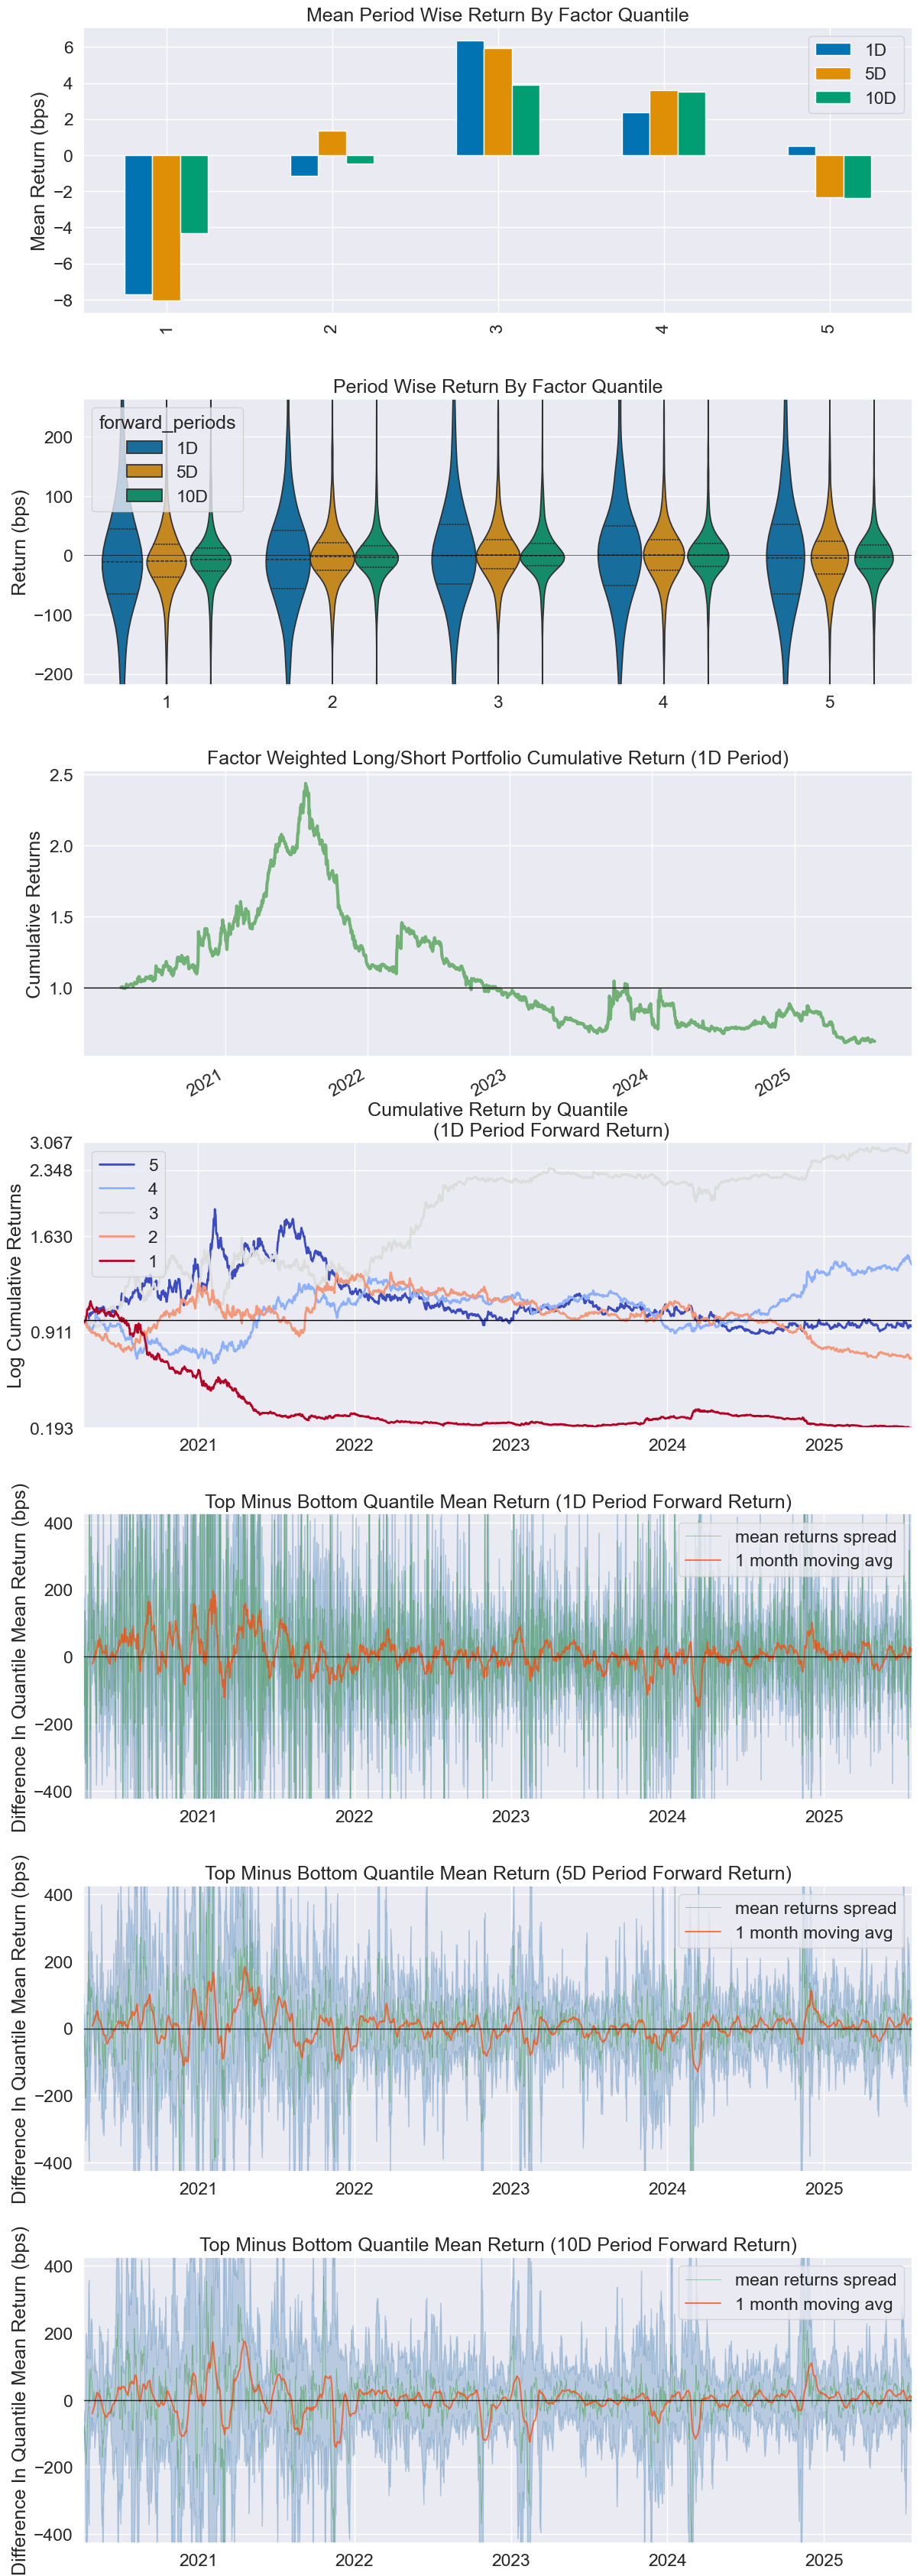

Information Analysis


,1D,5D,10D
IC Mean,0.007,0.018,0.018
IC Std.,0.151,0.153,0.151
Risk-Adjusted IC,0.045,0.118,0.119
t-stat(IC),1.961,5.179,5.218
p-value(IC),0.050,0.000,0.000
IC Skew,0.013,0.050,0.002
IC Kurtosis,0.723,0.429,0.279


/Users/markszulyovszky/micromamba/envs/lab-backend/lib/python3.12/site-packages/alphalens/performance.py:118: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouper.append(pd.Grouper(freq=by_time))


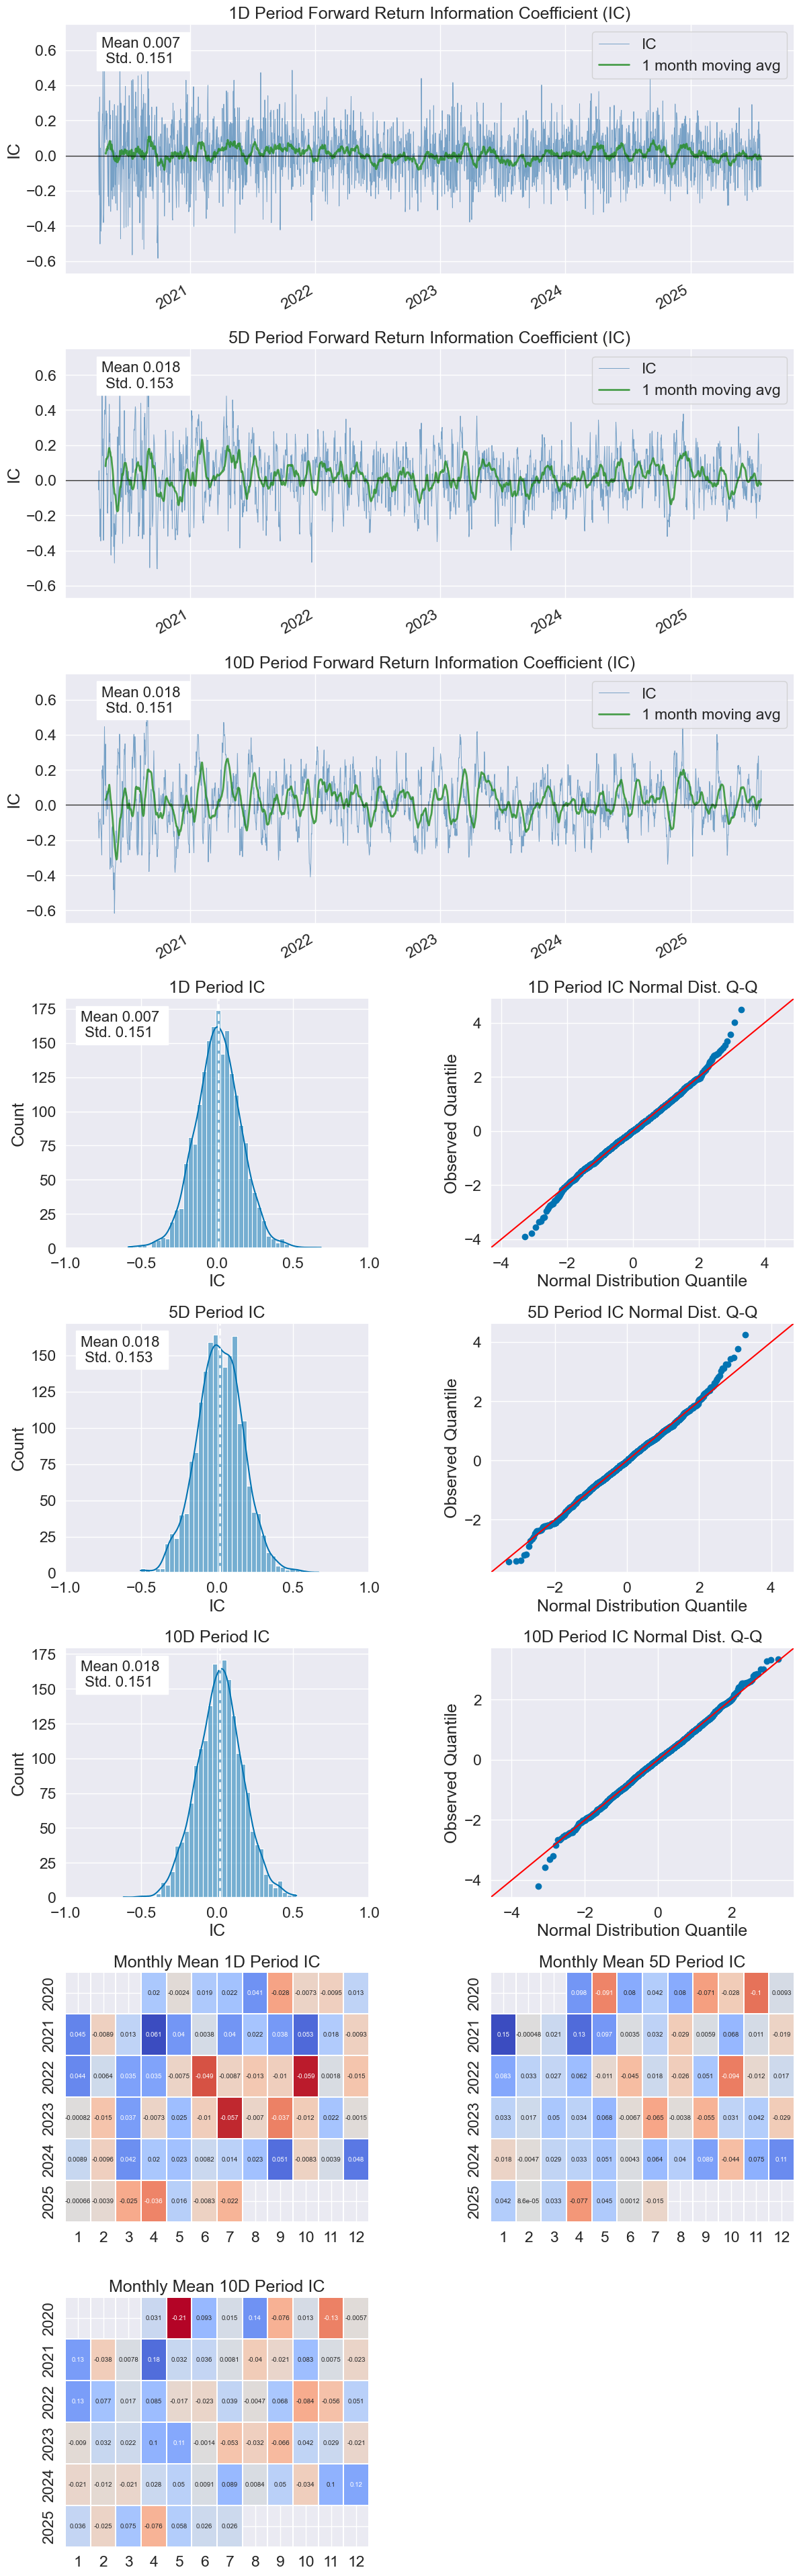

/Users/markszulyovszky/micromamba/envs/lab-backend/lib/python3.12/site-packages/alphalens/utils.py:928: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


,1D,5D,10D
Quantile 1 Mean Turnover,0.124,0.438,0.566
Quantile 2 Mean Turnover,0.275,0.654,0.715
Quantile 3 Mean Turnover,0.292,0.672,0.735
Quantile 4 Mean Turnover,0.237,0.618,0.698
Quantile 5 Mean Turnover,0.094,0.338,0.450


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.97,0.689,0.513


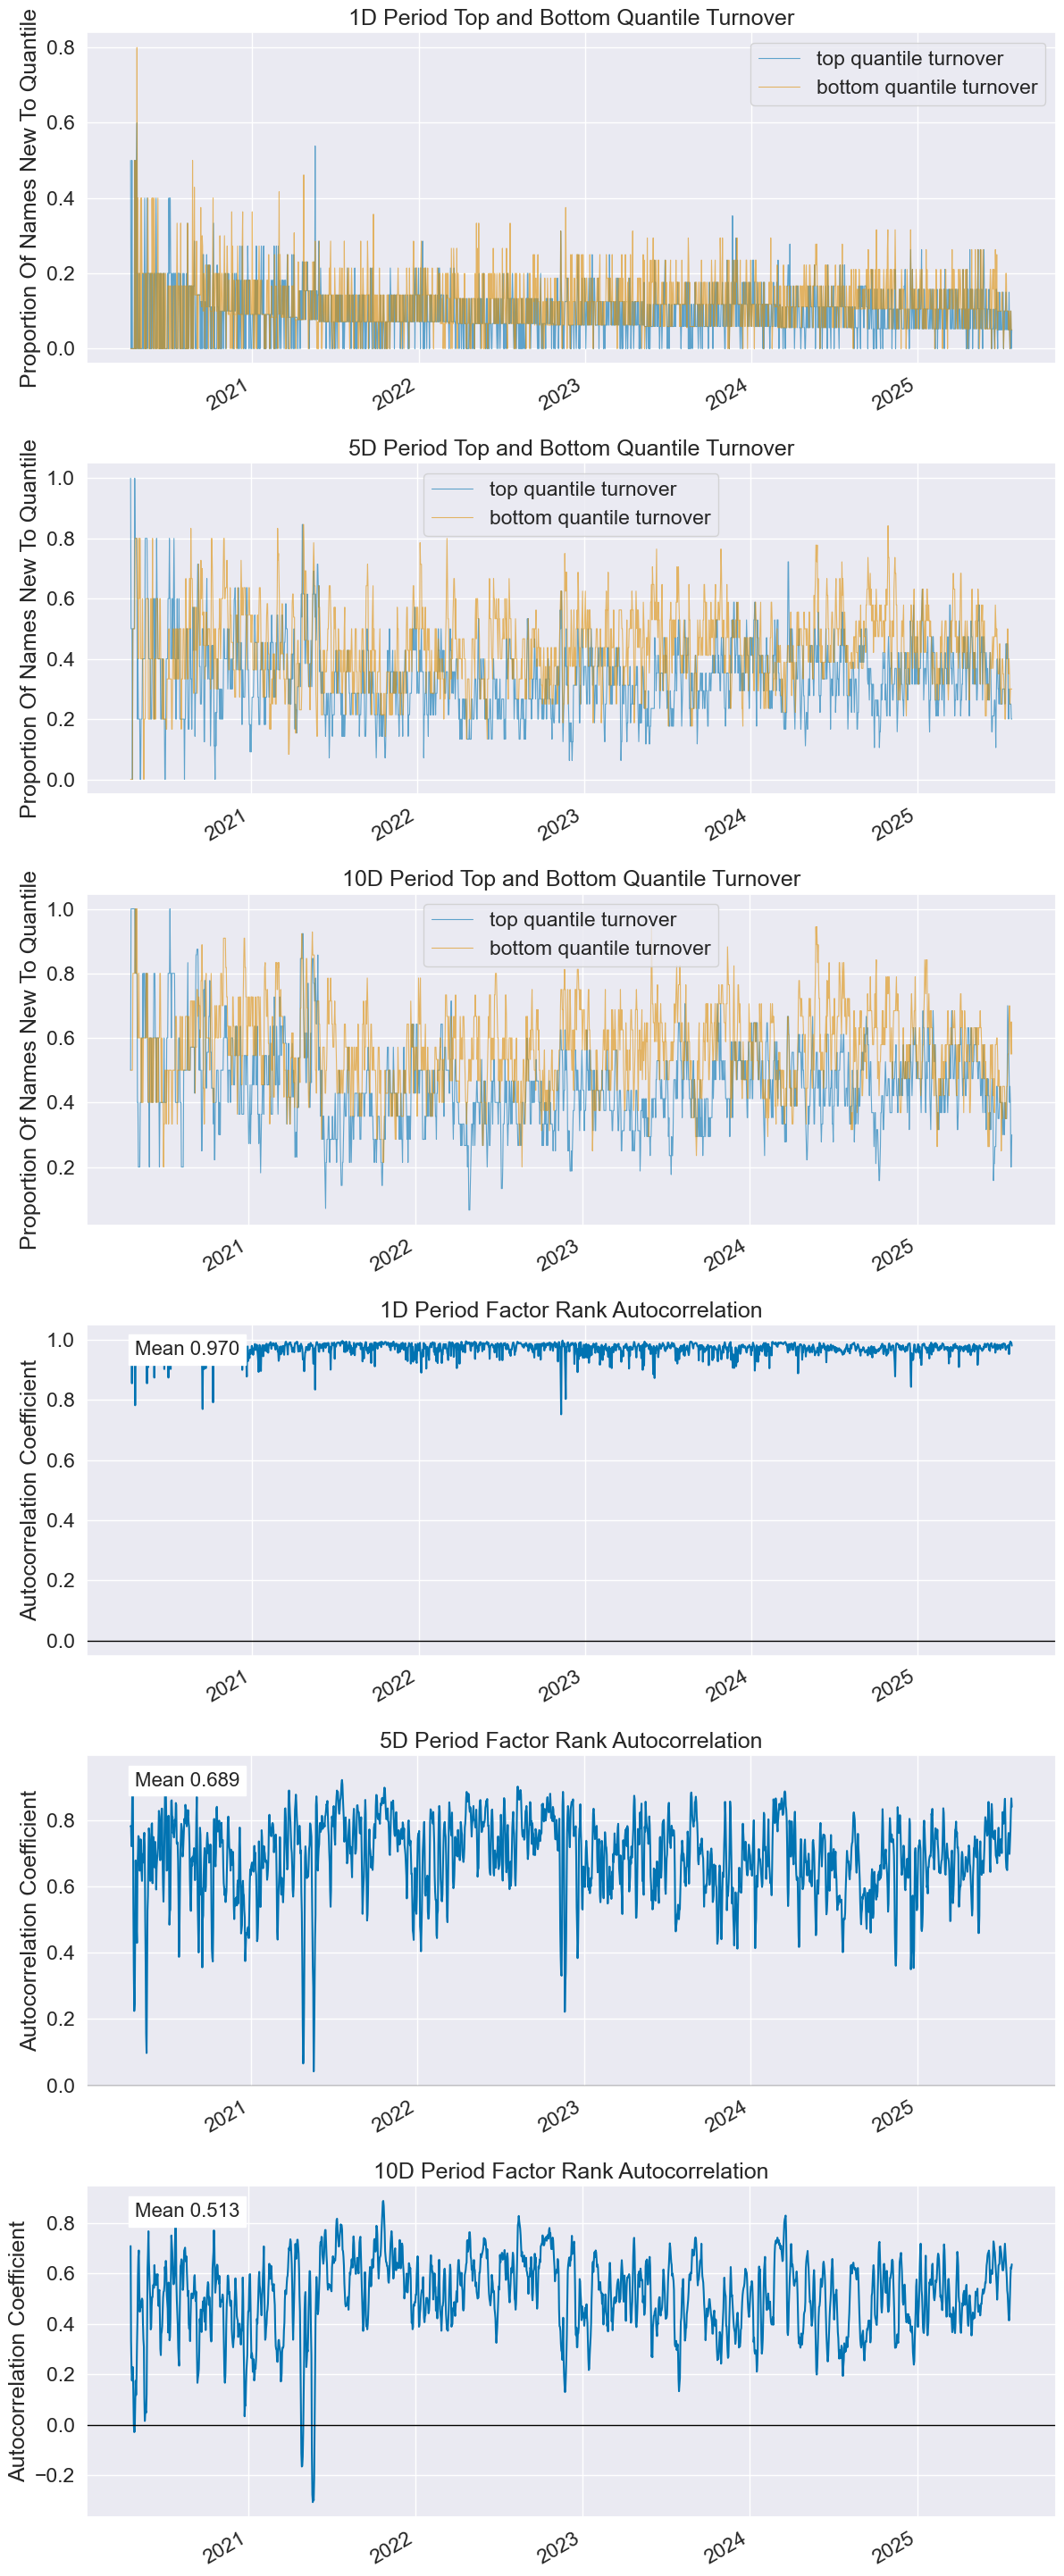

In [ ]:

from typing import Any


from analysis.utils import get_env

from analysis.alphalens import factor_analysis
from analysis.price import get_price_data
from api.portfolio.factors import get_portfolio_factors_historical
from api.portfolio.tickers import get_tickers

UNRAVEL_API_KEY = get_env("UNRAVEL_API_KEY")
portfolio = "carry_enhanced"

available_tickers = get_tickers(portfolio, UNRAVEL_API_KEY, universe_size="30")
historical_factors = get_portfolio_factors_historical(
    portfolio, available_tickers, UNRAVEL_API_KEY
)

underlying = get_price_data(available_tickers)

columns_intersection = historical_factors.columns.intersection(underlying.columns)
factor_analysis(historical_factors[columns_intersection], underlying)